In [47]:
from collections import Counter
from io import StringIO
import pandas as pd
import altair as alt

In [53]:
alt.renderers.enable('notebook')

In [20]:
with open('sample') as input_file:
    for _ in range(10):
        parts = input_file.readline().strip().split('\t')
        print(parts[0], parts[2], parts[3], parts[4], parts[5], 1-(int(parts[4]) + int(parts[5]))/int(parts[3]), parts[17], parts[18], parts[19], parts[20])


BOT2cds1488 30.909 220 151 1 0.3090909090909091 a-proteobacteria 1898112 Rhodospirillaceae bacterium Bacteria
BOT2cds1488 28.033 239 167 5 0.2803347280334728 a-proteobacteria 1898112 Rhodospirillaceae bacterium Bacteria
BOT2cds1488 30.786 471 320 5 0.30997876857749473 e-proteobacteria 1968531 Helicobacteraceae bacterium 4484_230 Bacteria
BOT2cds1488 32.983 476 307 7 0.3403361344537815 g-proteobacteria 568106 Marinobacterium lutimaris Bacteria
BOT2cds1488 30.108 279 189 6 0.30107526881720426 g-proteobacteria 568106 Marinobacterium lutimaris Bacteria
BOT2cds1488 23.144 229 175 1 0.23144104803493448 g-proteobacteria 568106 Marinobacterium lutimaris Bacteria
BOT2cds1488 30.603 464 316 4 0.31034482758620685 d-proteobacteria 34031 Desulfobacter vibrioformis Bacteria
BOT2cds1488 22.000 500 335 10 0.31000000000000005 d-proteobacteria 34031 Desulfobacter vibrioformis Bacteria
BOT2cds1488 25.105 239 174 5 0.2510460251046025 d-proteobacteria 34031 Desulfobacter vibrioformis Bacteria
BOT2cds1488 3

In [8]:
ls

BOT1_nr.tsv  BOT2_nr_single.tsv  BOT2_nr.tsv  magnetotactic.ipynb  sample


In [13]:
%%bash
awk 'BEGIN {FS="\t"} {print $21}' BOT1_nr.tsv | head 

Archaea
Bacteria
Bacteria
Bacteria
Bacteria
Bacteria
Eukaryota
Bacteria
Bacteria
Bacteria


In [24]:
%%bash
awk 'BEGIN {FS="\t"} {print $18}' BOT1_nr.tsv | sort | uniq -c |sort -k1nr

   6558 g-proteobacteria
   5264 a-proteobacteria
   4504 d-proteobacteria
   3341 bacteria
   2559 b-proteobacteria
   1127 proteobacteria
   1123 firmicutes
    680 cyanobacteria
    399 CFB group bacteria
    363 high GC Gram+
    258 verrucomicrobia
    209 enterobacteria
    208 dinoflagellates
    183 e-proteobacteria
    179 GNS bacteria
    174 euryarchaeotes
    171 ascomycetes
    101 eudicots
     95 planctomycetes
     88 bony fishes
     74 green sulfur bacteria
     65 apicomplexans
     59 a-proteobacteria;proteobacteria
     55 viruses
     52 spirochetes
     50 chlamydias
     36 aquificales
     36 archaea
     34 basidiomycetes
     31 actinobacteria
     25 N/A
     24 fungi
     22 kinetoplastids
     20 brachiopods
     20 nematodes
     19 birds
     19 stony corals
     18 crenarchaeotes
     18 flatworms
     16 lizards
     15 flies
     14 bivalves
     13 b-proteobacteria;proteobacteria
     13 rodents
     12 thermotogales
     11 a-proteobacteria;g-proteo

In [14]:
cat run_blastp_nr.sh

#!/bin/bash

if [ $# != 1 ] ; then
  echo "Usage: run_blastp_nr.sh $INPUT_FASTA" >&2
  exit 1
fi
SAMPLE=$1
PATH=$PATH:/tools/software/singularity-2.5.2/bin
export PATH
BLAST="singularity exec -B /tools /tools/simg/blast-2.7.1.sing blastp"
DB=/tools/databases/ncbi/nr/default/nr
#DB=/tools/databases/ncbi/ref_prok_rep_genomes/default/ref_prok_rep_genomes
BLASTDB=$(dirname $DB)
export BLASTDB
IN_DIR=$HOME/mapula
NUM_THREADS=$(expr $SLURM_JOB_CPUS_PER_NODE - 1)
/usr/bin/time $BLAST -num_threads $NUM_THREADS -db $DB -outfmt "6 std slen qlen qcovs qcovhsp stitle sblastnames staxids sscinames sskingdoms" -out blast_results/${SAMPLE}_nr.tsv -query $IN_DIR/${SAMPLE}.faa -max_target_seqs 10 -evalue 10 -negative_seqidlist $IN_DIR/accession_list.txt


 1. 	 qseqid 	 query (e.g., gene) sequence id
 2. 	 sseqid 	 subject (e.g., reference genome) sequence id
 3. 	 pident 	 percentage of identical matches
 4. 	 length 	 alignment length
 5. 	 mismatch 	 number of mismatches
 6. 	 gapopen 	 number of gap openings
 7. 	 qstart 	 start of alignment in query
 8. 	 qend 	 end of alignment in query
 9. 	 sstart 	 start of alignment in subject
 10. 	 send 	 end of alignment in subject
 11. 	 evalue 	 expect value
 12. 	 bitscore 	 bit score

In [21]:
whitelist = [
    'g-proteobacteria',
    'a-proteobacteria',
    'd-proteobacteria',
    'b-proteobacteria',
    'firmicutes',
    'cyanobacteria',
    'CFB group bacteria',
    'GNS bacteria',
    'e-proteobacteria',
    'planctomycetes',
    'verrucomicrobia',
    'chlamydias',
    'green sulfur bacteria',
    'actinobacteria',
    'cyanobacteria',
    'fusobacteria',
    'thermotogales']

In [25]:
categories = """   6558 g-proteobacteria
   5264 a-proteobacteria
   4504 d-proteobacteria
   3341 bacteria
   2559 b-proteobacteria
   1127 proteobacteria
   1123 firmicutes
    680 cyanobacteria
    399 CFB group bacteria
    363 high GC Gram+
    258 verrucomicrobia
    209 enterobacteria
    208 dinoflagellates
    183 e-proteobacteria
    179 GNS bacteria
    174 euryarchaeotes
    171 ascomycetes
    101 eudicots
     95 planctomycetes
     88 bony fishes
     74 green sulfur bacteria
     65 apicomplexans
     59 a-proteobacteria;proteobacteria
     55 viruses
     52 spirochetes
     50 chlamydias
     36 aquificales
     36 archaea
     34 basidiomycetes
     31 actinobacteria
     25 N/A
     24 fungi
     22 kinetoplastids
     20 brachiopods
     20 nematodes
     19 birds
     19 stony corals
     18 crenarchaeotes
     18 flatworms
     16 lizards
     15 flies
     14 bivalves
     13 b-proteobacteria;proteobacteria
     13 rodents
     12 thermotogales
     11 a-proteobacteria;g-proteobacteria
     11 g-proteobacteria;proteobacteria
     11 sea anemones
     10 glomeromycetes
     10 other sequences
      9 bacteria;proteobacteria
      9 choanoflagellates
      9 placentals
      8 beetles
      8 monocots
      7 frogs & toads
      7 sea urchins
      7 termites
      6 cellular slime molds
      6 gastropods
      6 mites & ticks
      6 primates
      5 proteobacteria;viruses
      4 oomycetes
      4 whales & dolphins
      3 a-proteobacteria;bacteria
      3 bats
      3 brown algae
      3 bugs
      3 crustaceans
      3 eukaryotes
      3 fusobacteria
      3 liverworts
      3 mosses
      3 odd-toed ungulates
      2 a-proteobacteria;g-proteobacteria;proteobacteria
      2 a-proteobacteria;viruses
      2 bees
      2 ciliates
      2 cryptomonads
      2 even-toed ungulates
      2 g-proteobacteria;viruses
      2 lancelets
      2 mosquitos
      2 moths
      2 segmented worms
      2 tunicates
      1 "Acetobacter ascendens" (Henneberg 1898) Kim et al. 2018;a-proteobacteria
      1 ants
      1 a-proteobacteria;b-proteobacteria
      1 a-proteobacteria;firmicutes
      1 bacteria;enterobacteria
      1 bacteria;firmicutes;proteobacteria
      1 bacteria;g-proteobacteria
      1 b-proteobacteria;d-proteobacteria
      1 b-proteobacteria;g-proteobacteria
      1 b-proteobacteria;g-proteobacteria;proteobacteria
      1 b-proteobacteria;high GC Gram+
      1 butterflies
      1 cephalopods
      1 CFB group bacteria;bacteria;enterobacteria
      1 cyanobacteria;firmicutes
      1 diatoms
      1 d-proteobacteria;euryarchaeotes
      1 d-proteobacteria;proteobacteria
      1 eudicots;other sequences
      1 GNS bacteria;d-proteobacteria
      1 green plants
      1 insectivores
      1 marsupials
      1 myxozoans
      1 other sequences;viruses
      1 red algae
      1 spiders
      1 sponges
      1 trichomonads
      1 turtles
      1 wasps &c.
"""

In [35]:
from io import StringIO
whiteset = set(whitelist)
accepted_set = set()
rejected_set = set()
for line in StringIO(categories):
    words = [line.strip().split(maxsplit=1)[1]]
    if ';' in line:
        words = words[0].split(';')
    for word in words:
        if word in whiteset:
            accepted_set.add(word)
        else:
            rejected_set.add(word)
print(', '.join(list(rejected_set)[:-1]) + ' and ' + list(rejected_set)[-1])

frogs & toads, flatworms, ascomycetes, oomycetes, tunicates, birds, odd-toed ungulates, mites & ticks, spiders, sponges, trichomonads, viruses, monocots, insectivores, fungi, bats, bony fishes, eudicots, cellular slime molds, segmented worms, bivalves, aquificales, flies, gastropods, turtles, nematodes, spirochetes, lizards, "Acetobacter ascendens" (Henneberg 1898) Kim et al. 2018, lancelets, bugs, glomeromycetes, liverworts, bacteria, bees, cryptomonads, euryarchaeotes, moths, whales & dolphins, enterobacteria, archaea, green plants, eukaryotes, ants, placentals, cephalopods, myxozoans, rodents, red algae, other sequences, brachiopods, basidiomycetes, sea anemones, mosquitos, N/A, stony corals, termites, butterflies, choanoflagellates, crenarchaeotes, primates, high GC Gram+, crustaceans, mosses, wasps &c., even-toed ungulates, apicomplexans, dinoflagellates, sea urchins, brown algae, kinetoplastids, marsupials, beetles, ciliates, diatoms and proteobacteria


In [44]:
def filter_blast_hits(filename):
    with open(filename) as input_file:
        current_query = ''
        query_changed = False
        for line in input_file:
            parts = line.strip().split('\t')
            category = parts[17]
            query = parts[0]
            if query != current_query:
                current_query = query
                query_change = True
            if query_change and category in whiteset:
                yield line
                query_change = False
bot1 = filter_blast_hits('BOT1_nr.tsv')
for _ in range(5):
    print(next(bot1), end='')

BOT1cds1	WP_105417456.1	22.222	153	113	4	6	155	4	153	8.31e-04	49.7	200	217	69	69	hypothetical protein [Neorhizobium sp. T25_27]	a-proteobacteria	2093831	Neorhizobium sp. T25_27	Bacteria
BOT1cds2	WP_105417458.1	29.779	272	174	7	8	272	8	269	2.28e-30	124	276	275	96	96	hypothetical protein [Neorhizobium sp. T25_27]	a-proteobacteria	2093831	Neorhizobium sp. T25_27	Bacteria
BOT1cds3	PLY14434.1	55.556	1017	452	0	1	1017	1	1017	0.0	1133	1030	1021	99	99	AcrB/AcrD/AcrF family protein [Sedimenticola sp.]	g-proteobacteria	1940285	Sedimenticola sp.	Bacteria
BOT1cds4	WP_029134727.1	34.615	312	204	0	24	335	26	337	1.25e-54	191	340	349	89	89	efflux RND transporter periplasmic adaptor subunit [Sedimenticola selenatireducens]	g-proteobacteria	191960	Sedimenticola selenatireducens	Bacteria
BOT1cds5	WP_007759568.1	26.389	144	89	5	50	191	395	523	1.0	42.0	527	255	56	56	beta-hexosaminidase [Bacteroides finegoldii]	CFB group bacteria	338188;997888	Bacteroides finegoldii;Bacteroides finegoldii CL09T03C10	Bacteri

In [81]:
bot1_category_count = Counter([line.strip().split('\t')[17] for line in filter_blast_hits('BOT1_nr.tsv')])
bot1_category_count.most_common()

[('g-proteobacteria', 782),
 ('d-proteobacteria', 602),
 ('a-proteobacteria', 548),
 ('b-proteobacteria', 234),
 ('firmicutes', 145),
 ('cyanobacteria', 63),
 ('CFB group bacteria', 50),
 ('GNS bacteria', 27),
 ('e-proteobacteria', 26),
 ('verrucomicrobia', 22),
 ('planctomycetes', 12),
 ('green sulfur bacteria', 10),
 ('actinobacteria', 9),
 ('fusobacteria', 1),
 ('chlamydias', 1),
 ('thermotogales', 1)]

In [82]:
bot2_category_count = Counter([line.strip().split('\t')[17] for line in filter_blast_hits('BOT2_nr.tsv')])
bot2_category_count.most_common()

[('g-proteobacteria', 400),
 ('d-proteobacteria', 350),
 ('a-proteobacteria', 342),
 ('b-proteobacteria', 150),
 ('firmicutes', 78),
 ('cyanobacteria', 46),
 ('CFB group bacteria', 30),
 ('GNS bacteria', 21),
 ('planctomycetes', 13),
 ('verrucomicrobia', 11),
 ('e-proteobacteria', 9),
 ('actinobacteria', 6),
 ('green sulfur bacteria', 3),
 ('chlamydias', 2),
 ('fusobacteria', 1)]

In [79]:
bot1_data = pd.DataFrame(bot1_category_count.most_common(), columns=['Category', 'BOT1 Count'])
bot2_data = pd.DataFrame(bot2_category_count.most_common(), columns=['Category', 'BOT2 Count'])

In [105]:
bot1_chart = alt.Chart(bot1_data).mark_bar().encode(x='Category', y='BOT1 Count')


In [106]:
bot2_chart = alt.Chart(bot2_data).mark_bar(color='red').encode(x='Category', y='BOT2 Count')


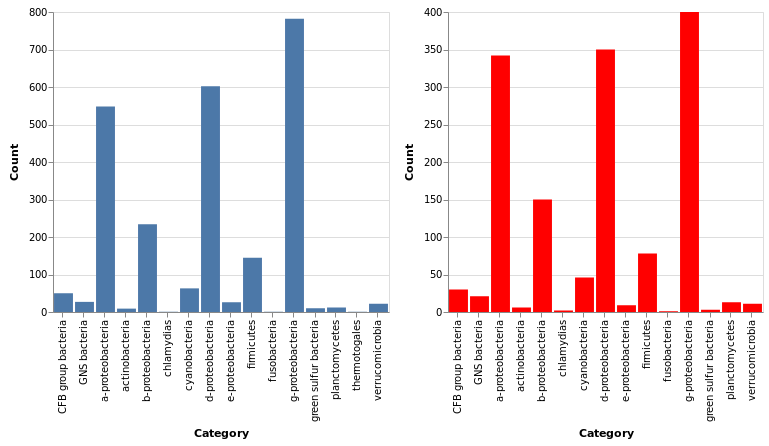

In [78]:
bot1_chart | bot2_chart

In [90]:
with open('BOT1_filtered_blast.tsv', 'w') as output_file:
    for line in filter_blast_hits('BOT1_nr.tsv'):
        output_file.write(line)

In [91]:
with open('BOT2_filtered_blast.tsv', 'w') as output_file:
    for line in filter_blast_hits('BOT2_nr.tsv'):
        output_file.write(line)

In [96]:
def get_ids(filename):
    id_list = []
    with open(filename) as input_file:
        for line in input_file:
            if line.startswith('>'):
                id_list.append(line[1:].strip().split()[0])
    return id_list
bot1_ids = get_ids('BOT1.faa')
bot2_ids = get_ids('BOT2.faa')


In [101]:
def find_missing_ids(filename, id_list):
    blast_hits = []
    for line in filter_blast_hits(filename):
        blast_hits.append(line.strip().split()[0])
    return sorted(list(set(id_list).difference(set(blast_hits))))
bot1_missing_ids = find_missing_ids('BOT1_nr.tsv', bot1_ids)
bot2_missing_ids = find_missing_ids('BOT2_nr.tsv', bot2_ids)

In [103]:
print("BOT1 missing ID count:", len(bot1_missing_ids))
print("BOT2 missing ID count:", len(bot2_missing_ids))

BOT1 missing ID count: 184
BOT2 missing ID count: 113
